## Введение

С момента своего появления в 2014 году, __`XGBoost`__ считается святым граалем соревнований по машинному обучению. __`XGBoost`__ доказал свою надежность с точки зрения производительности и скорости. 

__`XGBoost`__ - это хорошо оптимизированная распределенная библиотека с реализацией градиетного бустинга, разработанная для обеспечения высокой эффективности, гибкости и портативности. Библиотека содержит реализацию алгоритма, которая позволяет быстро и точно решать многие задачи Data Science. Модель может работать на разных платформах и способна обучаться на миллиардах примеров. __`XGBoost`__ означает `Extreme Gradient Boosting`. `XGBoost` используется для решения задач обучения с учителем, где мы используем обучающие данные $X_i$ для восстановлениям целевой переменной $y_i$.

## Модель и параметры

Модель для решения задачи обучения с учителем обычно представлена в виде математической структуры, которая принимает на вход $X_i$ и возвращает прогноз $y_i$. Типичным примером является линейная модель, где прогноз определяется следующим образом:

$$y_i = \sum_{j}{\theta_{j}x_{ij}}$$

Это линейная комбинация, это взвешенная сумма признаков и весов, подобранных в ходе обучения. Значение прогноза модели может иметь разные интерпретации в зависимости от решаемой задачи (классификация или регрессия). __Например__, его можно преобразовать (с использованием логит-преобразования) для получения вероятности принадлежности к положительному классу в логистической регрессии, а также выход модели можно использовать в качестве `ranking-score` для ранжирования выходных данных.

__Параметры__ - это неизвестная часть, которую мы хотим определить на основе данных. В модели линейной регрессии параметрами являются коэффициенты $\theta_i$, параметров в модели может быть много, наша задача их определить.

## Целевая функция

Objective Function = Training Loss + Regularization

Наша задача состоит в нахождении наилучших параметров $\theta_i$, которые наиболее подходят для обучающих данных $X_i$ и $y_i$. Для обучения модели, нам необходимо определить целевую функцию, чтобы измерить насколько хорошо модель соответствует обучающим данным. Отличительной особенностью `objective function` является то, что она состоит из двух частей: `loss` для обучения и составляющая для регуляризации:

$$obj(\theta) = L(\theta) + \Omega(\theta)$$

$L$ - это `loss function`, $\Omega$ - регуляризация;
Функция потерь оценивает ошибку и характеризует насколько наша модель смогла подстроиться под обучающие данные.

__Примером__ функции потерь может быть среднеквадратичная ошибка:

$$L(\theta) = \sum_{i}(y_i - \hat{y_i})^2$$

__Другим примером__ может быть логистическая функция потерь, которая используется в логистической регрессии:

$$L(\theta) = \sum_{i}(y_i \ln(1+\exp(\hat{-y_i})) + (1-y_i)\ln(1+\exp(\hat{y_i})))^2$$

Регуляризационный член - то, про что люди часто забывают :) Регуляризация позволяет контролировать сложности модели, что помогает избегать переобучения. Давай рассмотрим простой пример:

<img src="images/xgboost_img1.png" width=500 height=400 />

## Решающие деревья

Для начала поговорим о выбре базовых алгоритмов для `XGBoost`: это решающие деревья. Ансамбль состоит из набора `CART`-деревьев, которые подходят как для задачи классификации, так и для задачи регрессии. Вот пример `CART`-дерева, которые определяет понравится пользователю компьютерная игра или нет.

<img src="images/xgboost_trees.png" width=500 height=400 />

Мы классифицируем членов семьи по разным листам и присваиваем прогноз в соответствующем листе. В `CART`-деревьях процесс принятия решений немного отличается от классических деревьев, в которых лист содержит только значение прогноза. В `CART`-деревьях реальная оценка связана с каждым листом, что дает нам возможность более глубокой интерпретации процесса принятия решения. Это также позволяет использовать единый подход для оптимизации. 

__Обычно__. одного дерева решений недостаточно для построения качественной и устйчивой модели на практике. Будем использовать ансамбль моделей, который усреднит прогнозы нескольких отдельных моделей и поможет сделать итоговую модель более сильной и стабильной.

<img src="images/xgboost_trees_2.png" width=500 height=400 />

Это пример ансамбля из двух деревьев. Прогнозы для каждого отдельного дерева суммируются для получения окончательного результата. Если посмотреть на пример выше, то видно, что оба дерева пытаются дополнить друг друга. Математически, наша модель выглядить следующим образом:

$$\hat{y_i} = \sum_{k=1}^{K}f_k(x_i), f_k \in \mathbb{F}$$

$K$ - количество деревьев, $f$ - алгоритм из семейства $\mathbb{F}$,  $\mathbb{F}$ - семейство всех возможных `CART`-деревьев.

$$obj(\theta) = \sum_{i}^{n}l(y_i, \hat{y_i}) + \sum_{k=1}^{K}\Omega(f_k)$$

## Tree Boosting

Теперь, когда мы разобрались с базовыми понятиями, перейдем к рассмотрению бустинга, в частности, будем отвечать на вопрос: как нам обучать деревья? Ответ очень простой. Как и для всех моделей обучения с учителем, выберем целевую функцию и будем ее обучать. Наша целевая функция будет выглядеть так:

$$obj(\theta) = \sum_{i}^{n}l(y_i, \hat{y_i}) + \sum_{k=1}^{K}\Omega(f_k)$$

## Обучение

Первый вопрос, который мы можем задать - что такое параметры деревьев? Мы можем обнаружить, что нам необходимо обучить такие функции $f_i$, каждая из которых содержит структуру дерева и оценки прогноза в листьях. Обучение древовидных моделей намного сложнее, чем обучении классических моделей (например, линейных), когда мы можем взять градиент и использовать методы оптимизации. Выучить все деревья сразу слишком сложно. Вместо этого будем использовать __аддитивную стратегию__: будем исправлять то, что уже знаем и добавлять по одному новому дереву за раз. Будем записывать значения прогноза на шаге $t$ как $\hat{y_i^{(t)}}$. Тогда мы имеем:

$$\hat{y_i^{(0)}} = 0$$

$$\hat{y_i^{(1)}} = f_1(x_i) = \hat{y_i^{(0)}} + f_1(x_i)$$

$$\hat{y_i^{(2)}} = f_1(x_i) + f_2(x_i) = \hat{y_i^{(1)}} + f_2(x_i)$$

$$ ... $$

$$ \hat{y_i^{(t)}} = \sum_{k=1}^{t}f_k(x_i) = \hat{y_i^{(t-1)}} + f_t(x_i)$$

Как построить отдельное дерево? Так, чтбы минимизировать заданную функцию потерь:

$$obj^{(t)} = \sum_{i}^{n}l(y_i, \hat{y_i}) + \sum_{k=1}^{K}\Omega(f_k) = \sum_{i}^{n}l(y_i, \hat{y_i^{(t-1)}} + f_t(x_i)) + \sum_{k=1}^{K}\Omega(f_k) + constant$$

Рассмотрим среднеквадратичную функцию в качестве функции потерь, тогда наш `objective` будет таким:

$$obj^{(t)} = \sum_{i}^{n}l(y_i, \hat{y_i}) + \sum_{k=1}^{K}\Omega(f_k) = \sum_{i}^{n}l(y_i, \hat{y_i^{(t-1)}} + f_t(x_i)) + \sum_{k=1}^{K}\Omega(f_k) + constant$$

 $$obj^{(t)} = \sum_{i=1}^{n}(y_i - (\hat{y_i^{(t-1)}} + f_t(x_i)))^2 + \sum_{i=1}^{t}\Omega(f_i) = \sum_{i=1}^{n}[2(\hat{y_i^{(t-1)}} - y_i)f_t(x_i) + f_t(x_i)^2] + \Omega(f_t) + constant$$

Используем разложение в ряд Тейлора 2-го порядка:

 $$obj^{(t)} = \sum_{i=1}^{n}[l(y_i, \hat{y_i^{(t-1)}}) + g_if_t(x_i) + \frac{1}{2}h_if_t^2(x_i)] + \Omega(f_t) + constant$$
 
где

$g_i = \partial_{\hat{y_i^{(t-1)}}}l(y_i, \hat{y_i^{(t-1)}})$

$h_i = \partial^2_{\hat{y_i^{(t-1)}}}l(y_i, \hat{y_i^{(t-1)}})$

После того, как мы удалим все константы, функция потерь имеет следующий вид на шаге $t$

$$\sum_{i=1}^{n}[g_if_t(x_i) + \frac{1}{2}h_if_t^2(x_i)] + \Omega(f_t)$$

Это становится нашей конечной функцией потерь, мы будем оптимизировать эту функцию при построении нового дерева. Одним из важных преимуществ функции потерь является то, что значение функции потерь зависит только от $g_i$ и $h_i$. Таким образом, `XGBoost` поддерживает кастомные функции потерь, включая логистическую регрессию и попарное ранжирование, используя точно такую же функцию, которая принимает $g_i$ и $h_i$ в качестве входных параметров.

## Сложность модели

Мы описали характер функции потерь в `XGBoost`. Осталось понять одну вещь - как выглядит регуляризационная составляющая? Нам нужно определить сложность дерева $\Omega(f)$. Для этого введем уточним определение дерева $f(x)$ как:

$$f_t(x) = w_{q(x)}, w \in R^T, q: R^d \to [1, 2, ..., T]$$

* $w$ - вектор прогнозов в листьях
* $q$ - функция, которая назначает каждому примеру из выборки, соответствующий лист
* $T$ - количество листьев

В `XGBoost` осложность определяется как:

$$\Omega(f) = \gamma T + \frac{1}{2}\lambda\sum_{j=1}^{T}w_j^2$$

## The Structure Score

После переопределения модели дерева, мы можем записать функцию потерь:

$$obj^{(t)} =  \sum_{i=1}^{n}[g_iw_{q(x_i)} + \frac{1}{2}h_iw_{q(x_i)}^2] + \gamma T + \frac{1}{2}\lambda\sum_{j=1}^{T}w_j^2$$

$$obj^{(t)} =  \sum_{j=1}^{T} [(\sum_{i \in I_j}g_i)w_j + \frac{1}{2}(\sum_{i \in I_j}h_i + \lambda)w_j^2] + \gamma T$$

где $I_j$ = {$i|q(x_i) = j$} - множество индексов объектов, которые попали в $j$-ый лист деерва. Обратите внимание, что во второй строке мы изменили индекс суммирования, потому что все объекты в одном листе получают одинаковую оценку (прогноз). Мы можем дополнительно сжать выражение для функции потерь, $G_j = \sum_{i \in I_j} g_i$ и $H_j = \sum_{i \in I_j} h_i$:

$$obj^{(t)} = \sum_{j=1}^{T}[G_jw_j + \frac{1}{2}(H_j + \lambda)w_j^2] + \gamma T$$

Лучшие $w_j$ для заданной структуры выглядит следующим образом:

$$w_j^* = -\frac {G_j}{H_j + \lambda}$$

$$obj^* = -\frac {1}{2}\sum_{j=1}^{T}\frac {G_j^2} {H_j + \lambda} + \gamma T$$

Последняя выражение функции потерь оценивает `насколько хорошая структура дерева получилась` $q(x)$.

<img src="images/xgboost_trees_3.png" width=500 height=400 />

## Обучение дерева

Теперь, когда мы знаем, какой вид имеет функция потерь и как оценить насколько хорошим получилось дерева решений, мы должны построить все возможные деревья и выбрать лучшее. На практике, с этим очень сложно справиться, поэтому мы будем стараться строить дерево жадно, будем оптимизировать один уровень дерева за одну итерации. В частности, мы пытаемся разделить вершину на 2 листа и получаем результат:

$$Gain = \frac{1}{2}[\frac{G_L^2}{H_L+\lambda} + \frac{G_R^2}{H_R+\lambda} - \frac{(G_L+G_R)^2}{H_L+H_R+\lambda}] - \gamma$$

Формула может быть разложена на компоненты:
* оценка на новом левом листе
* оценка на новом правом листе
* оценка на исходном листе
* регуляризация на новом листе

Важная особенность, если `gain` меньше чем $\gamma$, то такое разбиение лучше не осуществлять. Это как раз и есть динамический способ регуляризации модели. Используя принципы обучения с учителем, мы можем естественным образом понять, почему этот метод работает или нет. Для реальных данных, мы обычно хотим найти оптимальное разделение. Чтобы сделать это эффективно, мы размещаем все примеры обучающей выборки в отсортированном порядке, как показано ниже:

<img src="images/xgboost_trees_4.png" width=500 height=400 />

Сканирования слева направо достаточно, для того, чтобы вычислить оценку всех возможных разбиений, и мы сможем эффективно найти лучшее разбиение.

## Жадный алгоритм поиска оптимального разбиения

Одна из ключевых задач при обучении деревьев решений, заключается в поиске оптимальной точки разбиения. В рамках этой задачи алгоритм поиска точки разбиения перебирает все возможные точки разбиения по всем признакам. Такой алгоритм называется __exact greedy algorithm__ (точный жадный алгоритм). Для эффективной работы алгоритма, требуется предварительно отсортировать данные по значениям признаков и в качестве потенциальной точки разбиения рассмотреть только те значения признаков, при которых происходит изменение целевой переменной с 0 на 1.

Точный жадный алгоритм эффективен с точки зрения поиска наилучшей точки разбиения, поскольку он жадно перебирает все возможные точки разбиения. Однако жадный алгоритм не оптимален в тех сулчаях, когда данные не помещаются в памяти целиком. Такая же проблема возникает при распределенных вычислениях; в таких случаях для реализации бустинга над решающими деревьями нам требуются аппроксимационный алгоритм. 

Аппроксимационный алгоритм предлагает возможные точки расщепления в соответствии с процентилями распределений признаков, после чего алгоритм разбивает непрерывные признаки на бины по этим возможным точкам расщепления, агрегируюет статистики на основе первой и второй производнойо и находит оптимальную точку разбиения. Существует два варианта алгоритма формирования потенциальных точек разбиения: глобальный и локальный. __Глобальный__ алгоритм предлагает все возможные точки разбиения в начале построения дерева и использует этот набор точек разбиения на всех стадиях построения дерева. __Локальный__ алгоритм, наоборот, заново формирует набор точек разбиения на каждом уровне дерева, заново формирует набор точек разбиения на каждом уровне дерева, что более оптимально для глубоких деревьев. 

In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [2]:
data = pd.DataFrame({
    "age": [10, 20, 30, 40],
    "target": [1, 1, 0, 0]
})

data.sort_values(by="age", ascending=False)

,age,target
3,40,0
2,30,0
1,20,1
0,10,1


In [4]:
data = pd.read_csv(
    "../Lesson_01/data/assignment1_data/train.csv"
)
print("data.shape = {} rows, {} cols".format(*data.shape))
data.head(n=2)

data.shape = 200000 rows, 202 cols


,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.093,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.389,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518


In [5]:
target = data["target"]
data = data.drop(["ID_code", "target"], axis=1)
print("data.shape = {} rows, {} cols".format(*data.shape))

data.shape = 200000 rows, 200 cols


In [6]:
x_train, x_valid = train_test_split(
    data, train_size=0.8, random_state=1
)
y_train, y_valid = train_test_split(
    target, train_size=0.8, random_state=1
)
print("x_train.shape = {} rows, {} cols".format(*x_train.shape))
print("x_valid.shape = {} rows, {} cols".format(*x_valid.shape))

x_train.shape = 160000 rows, 200 cols
x_valid.shape = 40000 rows, 200 cols


## XGBoost API

In [7]:
params = {
    "booster": "gbtree",
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "learning_rate": 0.1,
    "n_estimators": 1000,
    "reg_lambda": 100,
    "max_depth": 4,
    "gamma": 10,
    "nthread": 6,
    "seed": 27
}

In [8]:
dtrain = xgb.DMatrix(
    data=x_train, label=y_train
)
dvalid = xgb.DMatrix(
    data=x_valid, label=y_valid
)

In [9]:
model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=100,
    early_stopping_rounds=50,
    evals=[(dtrain, "train"), (dvalid, "valid")],
    verbose_eval=10,
    maximize=True,
)

[17:25:13] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-auc:0.60350	valid-auc:0.59630
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 50 rounds.
[10]	train-auc:0.71868	valid-auc:0.69837
[20]	train-auc:0.76241	valid-auc:0.73701
[30]	train-auc:0.79712	valid-auc:0.76810
[40]	train-auc:0.81519	valid-auc:0.78334
[50]	train-auc:0.83135	valid-auc:0.79719
[60]	train-auc:0.84345	valid-auc:0.80809
[70]	train-auc:0.85285	valid-auc:0.81605
[80]	train-auc:0.86236	valid-auc:0.82447
[90]	train-auc:0.86850	valid-auc:0.82975
[99]	train-auc:0.87439	valid-auc:0.83491


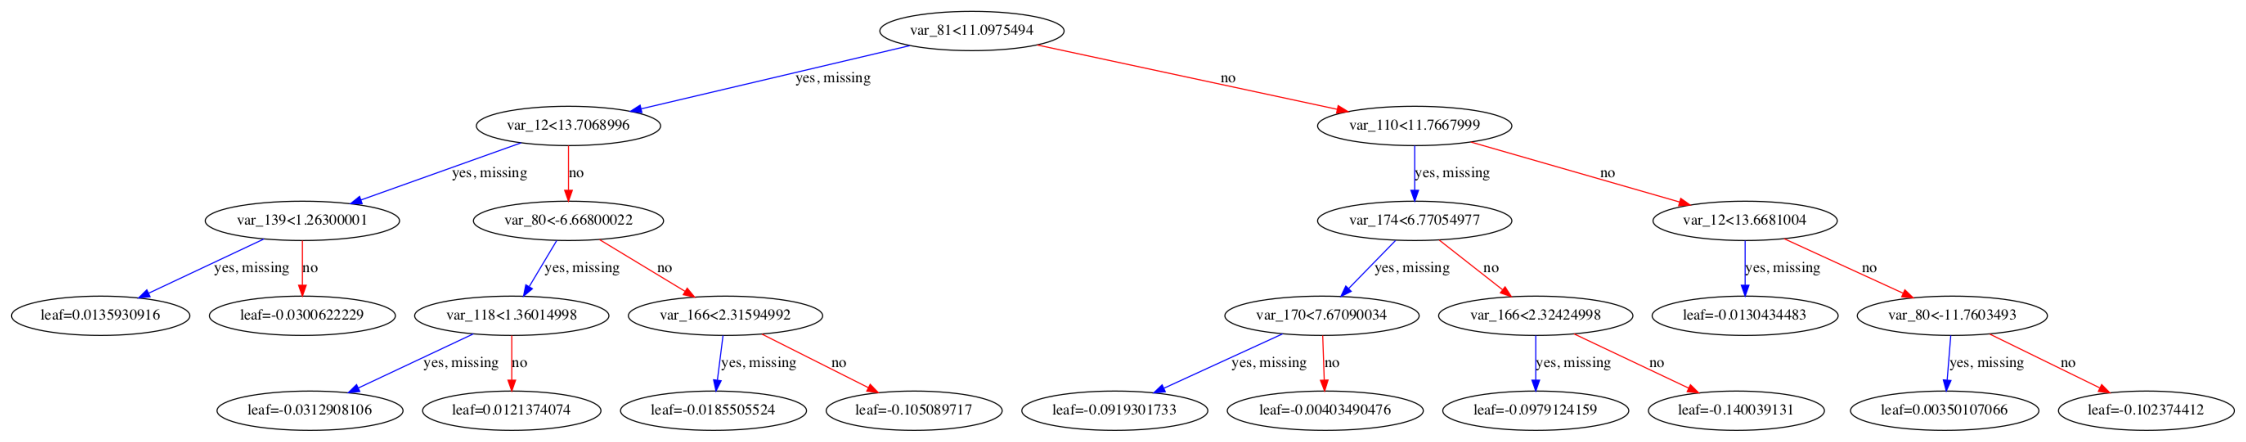

In [10]:
fig, axes = plt.subplots(1, 1, figsize=(40, 40))
xgb.plot_tree(model, num_trees=2, ax=axes)

## Cross-validation

In [11]:
cv_result = xgb.cv(
    params=params,
    dtrain=dtrain,
    num_boost_round=100,
    early_stopping_rounds=25,
    verbose_eval=25,
    stratified=True,
    metrics="auc",
    maximize=True,
    shuffle=True,
    nfold=3,
)

[17:31:04] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:31:08] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:31:12] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used 

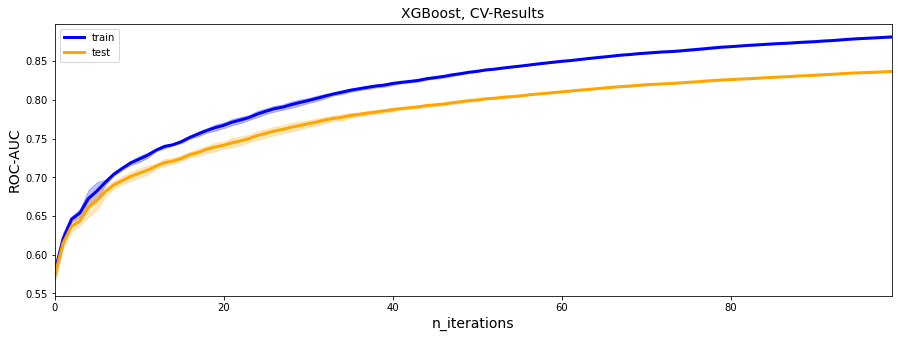

In [12]:
fig = plt.figure(figsize=(15, 5))
plt.plot(cv_result["train-auc-mean"], color="blue", linewidth=3, label="train")
plt.plot(cv_result["test-auc-mean"], color="orange", linewidth=3, label="test")
plt.fill_between(
    x=cv_result.index,
    y1=cv_result["train-auc-mean"] - cv_result["train-auc-std"],
    y2=cv_result["train-auc-mean"] + cv_result["train-auc-std"],
    alpha=0.25, color="blue"
)
plt.fill_between(
    x=cv_result.index,
    y1=cv_result["test-auc-mean"] - cv_result["test-auc-std"],
    y2=cv_result["test-auc-mean"] + cv_result["test-auc-std"],
    alpha=0.25, color="orange"
)
plt.title("XGBoost, CV-Results", size=14)
plt.xlabel("n_iterations", size=14)
plt.xlim(0, cv_result.index.max())
plt.ylabel("ROC-AUC", size=14)
plt.legend(loc="best")

## XGBoost Linear

In [13]:
params = {
    "booster": "gblinear",
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "learning_rate": 0.1,
    "n_estimators": 1000,
    "reg_lambda": 100,
    "max_depth": 4,
    "gamma": 10,
    "nthread": 6,
    "seed": 27
}

In [14]:
model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=100,
    early_stopping_rounds=50,
    evals=[(dtrain, "train"), (dvalid, "valid")],
    verbose_eval=10,
    maximize=True,
)

[17:42:41] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { gamma, max_depth, n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-auc:0.56095	valid-auc:0.56534
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 50 rounds.
[10]	train-auc:0.65039	valid-auc:0.65243
[20]	train-auc:0.68457	valid-auc:0.68606
[30]	train-auc:0.69795	valid-auc:0.69931
[40]	train-auc:0.70486	valid-auc:0.70609
[50]	train-auc:0.70952	valid-auc:0.71061
[60]	train-auc:0.71332	valid-auc:0.71425
[70]	train-auc:0.71668	valid-auc:0.71746
[80]	train-auc:0.71982	valid-auc:0.72046
[90]	train-auc:0.72279	valid-auc:0.72330
[99]	train-auc:0.72531	valid-auc:0.72571


## XGBoost Cross-Validation

In [15]:
cv_result = xgb.cv(
    params=params,
    dtrain=dtrain,
    num_boost_round=100,
    early_stopping_rounds=25,
    verbose_eval=25,
    stratified=True,
    metrics="auc",
    maximize=True,
    shuffle=True,
    nfold=3,
)

[17:43:27] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { gamma, max_depth, n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:43:27] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { gamma, max_depth, n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:43:28] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { gamma, max_depth, n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed d

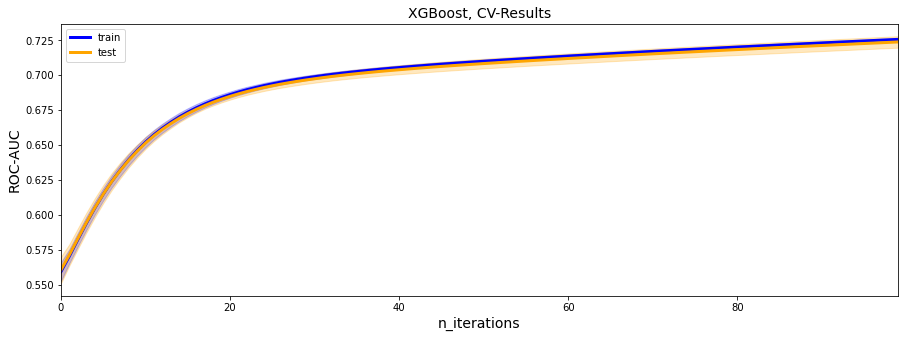

In [16]:
fig = plt.figure(figsize=(15, 5))
plt.plot(cv_result["train-auc-mean"], color="blue", linewidth=3, label="train")
plt.plot(cv_result["test-auc-mean"], color="orange", linewidth=3, label="test")
plt.fill_between(
    x=cv_result.index,
    y1=cv_result["train-auc-mean"] - cv_result["train-auc-std"],
    y2=cv_result["train-auc-mean"] + cv_result["train-auc-std"],
    alpha=0.25, color="blue"
)
plt.fill_between(
    x=cv_result.index,
    y1=cv_result["test-auc-mean"] - cv_result["test-auc-std"],
    y2=cv_result["test-auc-mean"] + cv_result["test-auc-std"],
    alpha=0.25, color="orange"
)
plt.title("XGBoost, CV-Results", size=14)
plt.xlabel("n_iterations", size=14)
plt.xlim(0, cv_result.index.max())
plt.ylabel("ROC-AUC", size=14)
plt.legend(loc="best")

## XGBoost sklearn-API

In [ ]:
model = xgb.XGBClassifier(**params)
model.fit(
    X=x_train,
    y=y_train,
    eval_set=[(x_train, y_train), (x_valid, y_valid)],
    early_stopping_rounds=50,
    eval_metric="auc",
    verbose=10
)